# Final Project 3

Nama            : Anindita Khusnul Oktavia <br>
Program         : Introduction to Python for Data Science <br>
Kode Peserta    : PYTN-KS02-006

Anggota Kelompok:
1. Anindita Khusnul Oktavia (PYTN-KS02-006)
2. Farah Alysa Putri        (PYTN-KS02-001)

## Perkenalan

Objektif yang ingin dicapai dari final project 3 ini yaitu mengevaluasi konsep Ensemble sebagai berikut :
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

Pada final project 3 ini akan dibuat prediksi keselamatan pasien dari penyakit jantung. Sehingga variabel DEATH_EVENT akan menjadi variabel dependen (variabel prediktor) dan beberapa variabel lainnya yang memiliki korelasi dengan variabel prediktor akan menjadi variabel independen.

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, diperkirakan merenggut 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model machine learning dapat sangat membantu.

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
random_state = 0

# Data Loading

In [4]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Dataset yang digunakan yaitu **Heart Failure Prediction** yang berisi record data pasien yang mengalami gagal jantung. Dataset ini terdiri dari 13 atribut dan 299 data. Dataset diperoleh dari kaggle dengan link sebagai berikut https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Atribut dalam dataset ini antara lain :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes (0 = non-diabetes, 1 = diabetes)
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (0 = live, 1 = dead)

# Data Cleaning & EDA

In [5]:
# Print the dimension of data set
df.shape

(299, 13)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Cek data types

In [7]:
#Melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Describing dataset

In [8]:
# melihat statistik dari dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Cek missing value

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dapat dilihat bahwa semua variabel menunjukkan nilai '0' artinya tidak terdapat missing value pada dataset.

## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

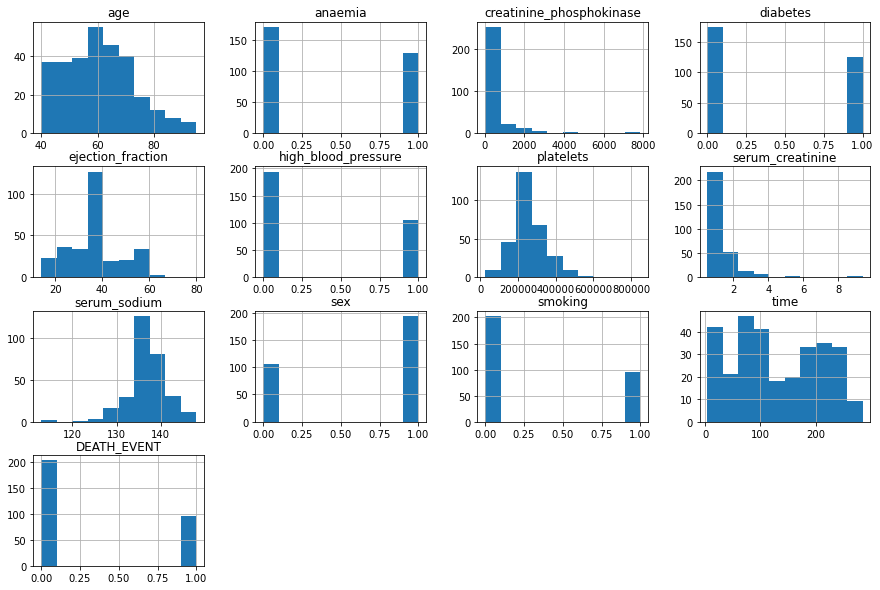

In [10]:
# melihat bentuk histogram dari semua variabel
df.hist(figsize=(15,10))

Total number of Living case: 203
Total number of Death case: 96


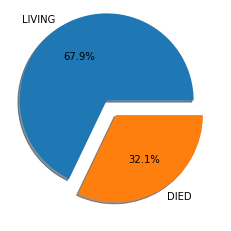

In [11]:
# melihat distribusi kelas death_event

len_live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
len_death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING','DIED']

print(f'Total number of Living case: {len_live}')
print(f'Total number of Death case: {len_death}')

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True, autopct='%1.1f%%')
plt.show()

Dari pie chart di atas menunjukkan bahwa terdapat 67.9% atau sebanyak 203 pasien yang selamat dan 32.1% atau sebanyak 96 pasien yang meninggal karena penyakit jantung kardiovaskular.

<AxesSubplot:xlabel='age', ylabel='Density'>

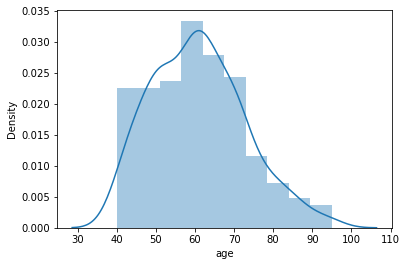

In [12]:
# melihat distribusi variabel 'age'

sns.distplot(df['age'])

Dari histogram variabel di atas dapat dilihat persebaran umur pasien yaitu ada dari 40 hingga sekitar 95 tahun, dan frekuensi terbanyak yaitu pasien berusia 50 hingga 60 an.

Total number of Died: 85
Total number of Not Died: 167


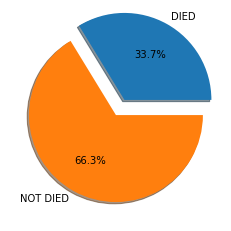

In [13]:
# melihat distribusi pasien berusia > 50 tahun yang selamat dan meninggal 

age_above_50_not_died = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Total number of Died: {len_died}')
print(f'Total number of Not Died: {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True, autopct='%1.1f%%')
plt.show()

Dari pie chart data pasien berusa lebih dari 50 tahun di atas menunjukkan bahwa terdapat 66.3% atau sebanyak 167 pasien yang selamat dan 33.7% atau sebanyak 85 pasien yang meninggal karena penyakit jantung kardiovaskular.

Total number of Died with diabetes: 40
Total number of Not died with diabetes: 118


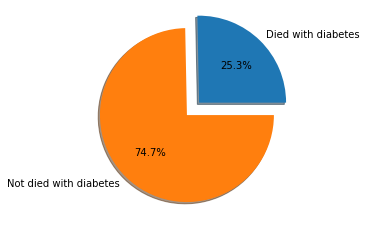

In [14]:
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.diabetes == 0][df.DEATH_EVENT ==0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.diabetes == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes: {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True, autopct='%1.1f%%')
plt.show()

Dari pie chart data pasien yang memiliki diabetes menunjukkan bahwa terdapat 74.7% atau 118 pasien dapat selamat dari penyakit jantung kardiovaskuler dan 25.3% atau sebanyak 40 pasien yang meninggal.

### checking correlation between variables
- -1 = terdapat korelasi negatif antara dua variabel
- 0 = tidak terdapat korelasi negatif antara dua variabel
- 1 = terdapat korelasi positif antara dua variabel

<AxesSubplot:>

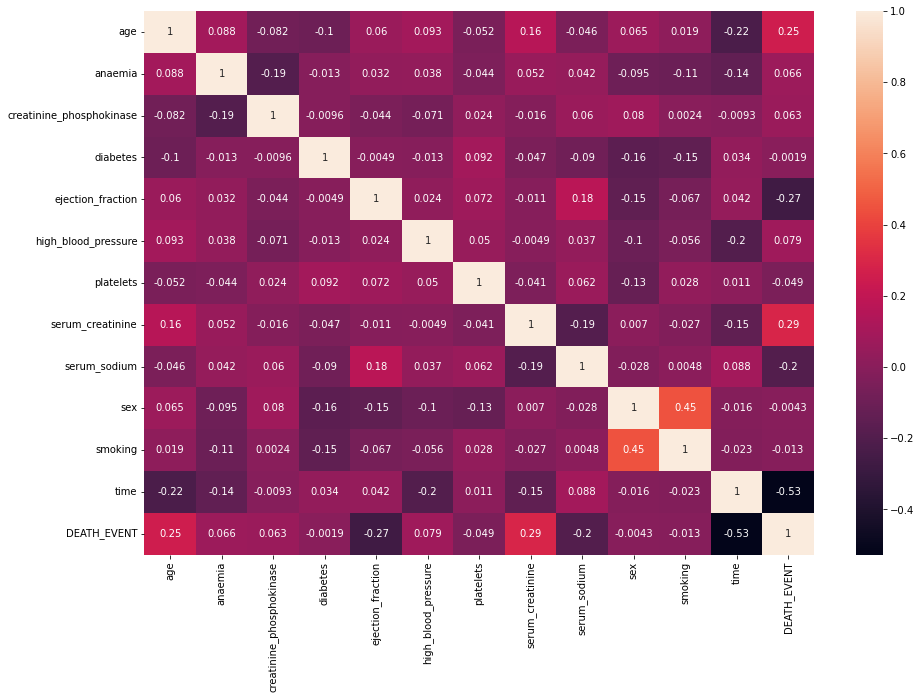

In [15]:
# melihat korelasi antar variabel dengan heatmap

corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [16]:
# melihat korelasi antar variabel dalam bentuk tabel

df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Dari heatmap dan tabel korelasi diperoleh nilai korelasi antara death_event (variabel prediktor) dengan variabel-variabel lainnya, yaitu sebagai berikut :
- age : 0.253729
- anaemia : 0.066270
- creatinine_phosphokinase : 0.062728
- diabetes : -0.001943
- ejection_fraction = -0.268603
- high_blood_pressure = 0.079351
- platelets : -0.049139
- serum_creatinine : 0.294278
- serum_sodium : -0.195204
- sex : -0.004316
- smoking : -0.012623
- time : -0.526964

## Feature Importance

Dari nilai korelasi yang diperoleh maka akan diambil beberapa fitur dari 12 variabel yang memiliki korelasi cukup besar terhadap variabel prediktor.

In [17]:
# memilih fitur yang memiliki nilai korelasi > 0.20

subset_features = corr[abs(corr["DEATH_EVENT"]) > 0.20]["DEATH_EVENT"].index

In [18]:
subset_features

Index(['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT'], dtype='object')

Variabel yang memiliki korelasi cukup besar terhadap variabel DEATH_EVENT yaitu variabel age, ejection_fraction, serum_creatinine, dan time dimana nilai korelasinya lebih dari 0.2

In [19]:
## Membuat data frame baru berisi variabel-variabel di atas

df = df.filter(items=subset_features)
df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


## Melihat distribusi variabel independen dengan variabel prediktor

Text(0.5, 1.0, 'Age Distribution against death event')

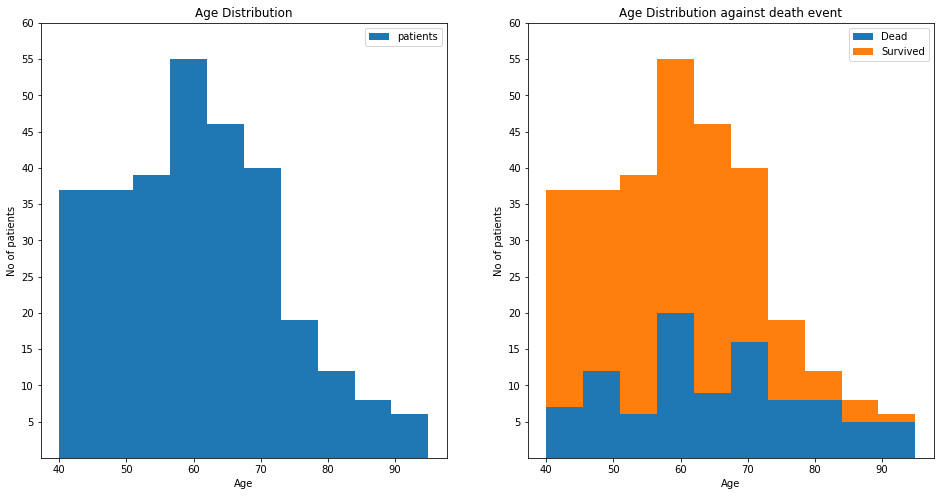

In [20]:
# melihat distribusi variabel 'age' dengan death_event

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['age'],label='patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('No of patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x=[df[df['DEATH_EVENT']==1]['age'],df[df['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('No of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].legend()
ax[1].set_title('Age Distribution against death event')

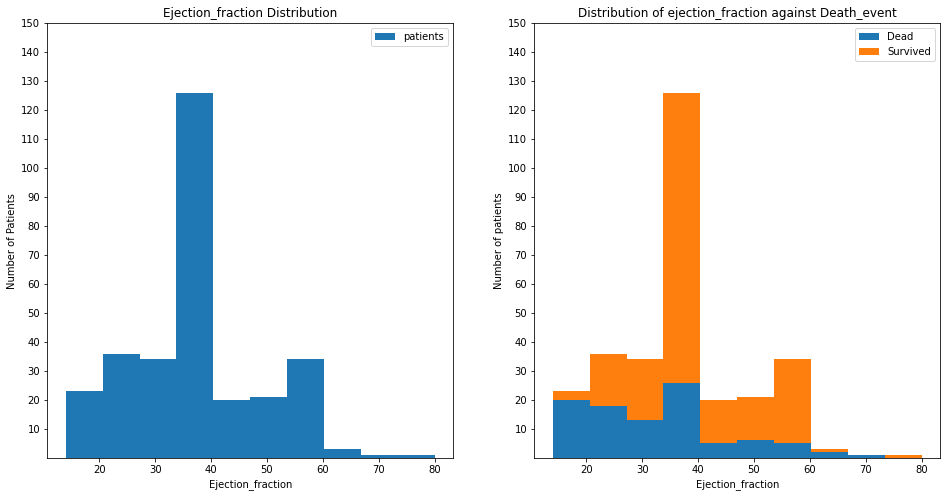

In [21]:
# melihat distribusi variabel 'ejection_fraction' dengan death_event

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['ejection_fraction'], label = 'patients')
ax[0].set_xlabel('Ejection_fraction')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Ejection_fraction Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['ejection_fraction'],df[df['DEATH_EVENT']==0]['ejection_fraction']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Ejection_fraction')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of ejection_fraction against Death_event')
ax[1].legend()

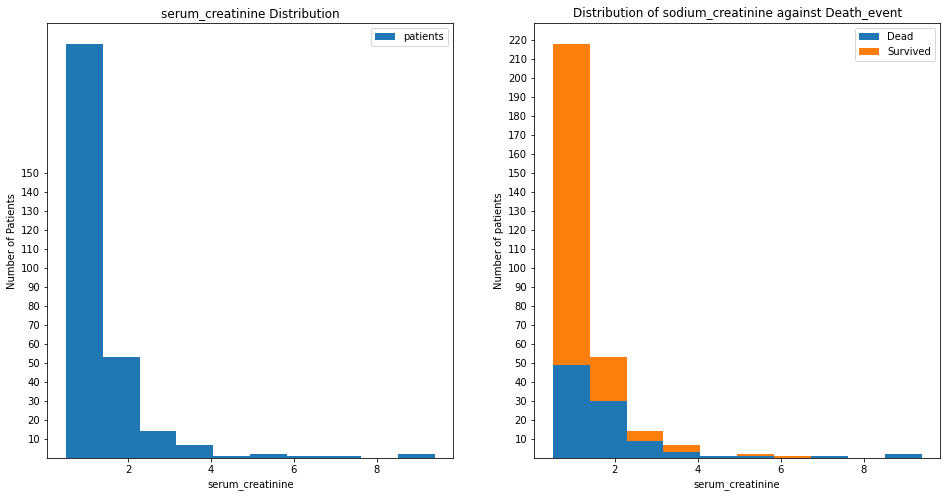

In [22]:
# melihat distribusi variabel 'Serum creatinine' dengan death_event

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['serum_creatinine'], label = 'patients')
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('serum_creatinine Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_creatinine'],df[df['DEATH_EVENT']==0]['serum_creatinine']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_creatinine')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of sodium_creatinine against Death_event')
ax[1].legend()

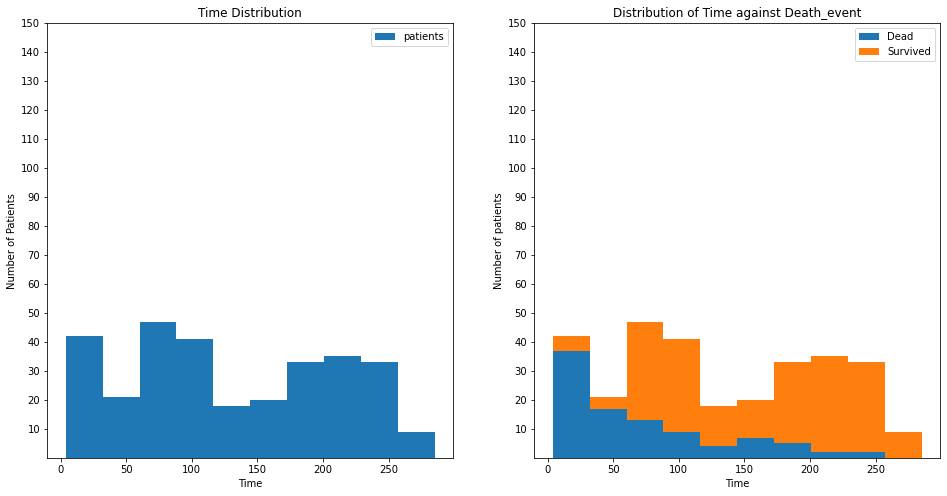

In [23]:
# melihat distribusi variabel 'time' dengan death_event

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['time'], label = 'patients')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Time Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['time'],df[df['DEATH_EVENT']==0]['time']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of Time against Death_event')
ax[1].legend()

# Dataset Development

In [24]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

Membagi dataset menjadi data training dan data testing dengan ratio 70:30

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= random_state)

print(f'Shape of the X_train {X_train.shape}')
print(f'Shape of the X_test {X_test.shape}')
print(f'Shape of the y_train {y_train.shape}')
print(f'Shape of the y_test {y_test.shape}')

Shape of the X_train (209, 4)
Shape of the X_test (90, 4)
Shape of the y_train (209,)
Shape of the y_test (90,)


In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Modelling

## Bagging
Also known as Bootstrap aggregating because the training set is divided into multiple sub samples and fed to each weak learner(for e.g.: each decision tree). And each sub sample contains a few set of features along with a few observations selected randomly.

### 1. Ensemble of same classifiers
Few examples are Random Forest , Extra tree classifiers/regressors, ensemble of linear regressors, ensemble of logistic regression classifiers, ensemble of SVMs etc.

#### Random Forest

In [27]:
# pelatihan model
clf = RandomForestClassifier(
    n_jobs=-1, class_weight="balanced", random_state=random_state
)
clf.fit(X_train, y_train)

y_pred1 = clf.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



#### Ensemble of logistic regression classifiers (Bagging Classifier)

In [28]:
# pelatihan model

# Multiple logistic regression classifiers using bagging Classifier.
# Number of logistic regression classifiers we are using here are 400.
logbagClf = BaggingClassifier(LogisticRegression(random_state=random_state, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = random_state)
logbagClf.fit(X_train, y_train)

y_pred1 = logbagClf.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        62
           1       0.76      0.57      0.65        28

    accuracy                           0.81        90
   macro avg       0.79      0.75      0.76        90
weighted avg       0.81      0.81      0.80        90



#### Extra Tree Classifiers

In [29]:
# pelatihan model
extra_tree=ExtraTreesClassifier(random_state=random_state)
extra_tree.fit(X_train, y_train)

y_pred1 = extra_tree.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        62
           1       0.83      0.71      0.77        28

    accuracy                           0.87        90
   macro avg       0.86      0.82      0.84        90
weighted avg       0.86      0.87      0.86        90



### 2. Ensemble of several different types of models (Voting Classifier)

For my testing purpose, I am using an ensemble of RandomForestClassifier, Support vector machine and Logistic regression.

In [30]:
# pelatihan model
rfClf = RandomForestClassifier(n_estimators=500, random_state=random_state) # 500 trees. 
svmClf = SVC(probability=True, random_state=random_state) # probability calculation
logClf = LogisticRegression(random_state=random_state)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 
clf2.fit(X_train, y_train)

y_pred1 = clf2.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        62
           1       0.81      0.61      0.69        28

    accuracy                           0.83        90
   macro avg       0.83      0.77      0.79        90
weighted avg       0.83      0.83      0.83        90



## Boosting
The main idea behind boosting is to convert weak learners to strong learners in sequential iterations.

### Extreme Gradient Boosting

In [31]:
# pelatihan model
xgb1 = XGBClassifier(colsample_bytree = 1.0, 
                    learning_rate = 0.1,
                    max_depth = 4,
                    n_estimators = 4,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds = 10, 
         eval_metric = 'logloss', eval_set = eval_set, 
         verbose = True)

pred = xgb1.predict(X_test)

# evaluasi model
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

[0]	validation_0-logloss:0.63975
[1]	validation_0-logloss:0.59577
[2]	validation_0-logloss:0.56053
[3]	validation_0-logloss:0.52838
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        62
           1       0.76      0.68      0.72        28

    accuracy                           0.83        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



# Final Model

Dari berbagai algoritma ensemble models yang telah dilakukan dapat dibandingkan berdasarkan accuracy yaitu sebagai berikut :

|Algorithm              | Accuracy           |
|-----------------------|--------------------|
| Random Forest         | 0.84               |
| Bagging Classifier    | 0.81               |
| Extra Tree Classifier | 0.87               |
| Voting Classifier     | 0.83               |
| XGBoost               | 0.83               |

In [32]:
# pelatihan model
extra_tree=ExtraTreesClassifier(random_state=random_state)
extra_tree.fit(X_train, y_train)

y_pred1 = extra_tree.predict(X_test)

accuracy_score: 0.8666666666666667


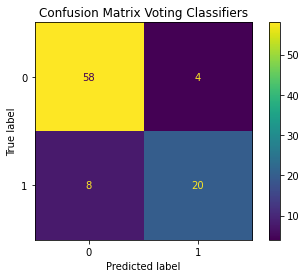

In [33]:
from sklearn.metrics import plot_confusion_matrix

print('accuracy_score:', accuracy_score(y_test, y_pred1))

plot_confusion_matrix(extra_tree, X_test, y_test, values_format='0.7g')
plt.title('Confusion Matrix Voting Classifiers')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:
- 58 prediksi true negatif : 58 data prediksi benar dinyatakan sebagai nol
- 8 prediksi false negatif: 8 data prediksi salah dinyatakan sebagai nol.
- 4 prediksi false positif: 4 data prediksi salah dinyatakan sebagai satu.
- 20 prediksi positif yang benar: 20 data prediksi benar dinyatakan sebagai satu.

Sehingga model ensemble yang paling baik digunakan untuk memprediksi keselamatan pasien dari penyakit jantung kardiovaskuler yaitu **Extra Tree Classifiers** dengan nilai accuracy 87%.

In [34]:
#save model

joblib.dump(extra_tree, 'model_ensemble.pkl')

['model_ensemble.pkl']

In [35]:
model_ensemble = joblib.load('model_ensemble.pkl')
model_ensemble.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Prediction

####  <span style='background:yellow'>Follow  these instructions before predicting the price:</span> 
<hr>

-  **For age**: Enter age value (ex : 40)

- **For ejection_fraction** : <font color = 'red'>Enter Ejection Fraction value (ex : 20)</font>

- **for serum_creatinine**:  <font color = 'blue'>Enter serum creatinine value between 1 - 10 (ex : 1.5) </font>

- **Time** : <font color = 'green'>Enter Time Value (ex : 6)</font>

####  <span style='background:yellow'>Hasil Prediksi:</span> 
<hr>

- **0**: pasien hidup

- **1**: pasien meninggal

Misalkan prediksi pasien dengan kriteria sebagai berikut :
1. age = 55 tahun
2. ejection_fraction = 30
3. serum_creatinine = 3
4. Time = 10

In [36]:
model_ensemble.predict([[55, 30, 3, 10]])

array([0], dtype=int64)

Hasil prediksinya yaitu pasien dengan kriteria seperti di atas adalah 0 yang artinya pasien selamat dari penyakit jantung kardiovaskuler.

# Kesimpulan

1. Pada project ini dilakukan prediksi keselamatan pasien dari penyakit jantung kardiovaskuler dengan variabel dependen yaitu 'DEATH_EVENT', serta variabel independen yaitu 'age', 'ejection_fraction', 'serum_creatinine' dan 'time'


2. Dari 12 variabel independen pada dataset, dipilih variabel 'age', 'ejection_fraction', 'serum_creatinine' dan 'time' untuk memprediksi keselamatan pasien karena variabel tersebut memiliki korelasi yang cukup besar terhadap variabel 'DEATH_EVENT' dengan nilai korelasi lebih dari 0.2


3. Dari beberapa model ensemble yang dilakukan terhadap dataset dengan split data 70:30, diperoleh nilai akurasinya sebagai berikut:
|Algorithm              | Accuracy           |
|-----------------------|--------------------|
| Random Forest         | 0.84               |
| Bagging Classifier    | 0.81               |
| Extra Tree Classifier | 0.87               |
| Voting Classifier     | 0.83               |
| XGBoost               | 0.83               |


4. Berdasarkan nilai akurasinya, maka model **Extra Tree Classifier** merupakan model terbaik untuk memprediksi keselamatan pasien karena memiliki nilai akurasi tertinggi yaitu sebesar **0.87 atau 87%**